<h1>Applied Text Mining and Sentiment Analysis with Python</h1>

In this course we will discover different applications that can be made of text mining. We are going to use this knowledge to focus on a particular NLP application: Sentiment Analysis.

***Note***: sometimes, the runtime of Colab might expire. If you see an error, always make sure all the code in previous cells has run correctly.

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 1` Dataset Overview



In this section, we are going to have a look at the dataset that we will use throughout the course.

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.1** Connect to Google Drive


* Initiate the connection with Google Drive

In [ ]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

* Specify the Google Drive file ID
  1. Navigate to the Google Drive folder where your `tweet_data.csv` file is located
  2. Right click on the file and click "Share" > "Copy Link"
  3. The FILE_ID is the unique identifier that follows "/file/d/" and ends before "/view" in the link. Copy this identifier
  4. For example, in the link `https://drive.google.com/file/d/ABC123/view`, the file ID is **ABC123**

In [ ]:
# Download a file based on its file ID.

# A file ID looks like: 1nEV7avrapV9zc5w-Zqa60XCJ2EbFs0tX
file_id = 'YOUR_FILE_ID' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('tweet_data.csv')

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.2** Load and analyse Dataset

Very useful packages for Data Analysis. Don't hesitate to visit any of those sites in case you don't get what we are doing.
*   `Pandas`: https://pandas.pydata.org/docs/
*   `Numpy`: https://numpy.org/doc/





In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("tweet_data.csv")

* Use the `sample` method to look at some random tweets present in our dataset

In [ ]:
df.sample(5)

,textID,tweet_text,sentiment
6213,1963907471,reyt fancies a valentinos. Worst of times cons...,negative
10605,1694438163,@dutchreaganite ROFLMAO! I feel inspired to go...,positive
4607,1962685720,@sianhughes_ oh god i just watched it to!! did...,negative
10301,1694312532,just cos i dont have an ipod touch yet - doesn...,positive
13336,1750931079,Sometimes i feel pathetic going to bed so earl...,negative


In [ ]:
print("Number of tweets: {}".format())

Number of tweets: 18727


* Print a tweet and its sentiment based on a tweet ID

In [ ]:
tweet_id = 4879
tweet = df.iloc[tweet_id]

In [ ]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: Bad Day. History Test Tommorrow. And I want to go out in the sun and play..
Tweet sentiment: negative


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.3** Dataset Visualisation

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.3.1** Matplotlib</h4>

In [ ]:
import matplotlib.pyplot as plt

* `pyplot` helps understanding and representing how tweets are distributed over the dataset

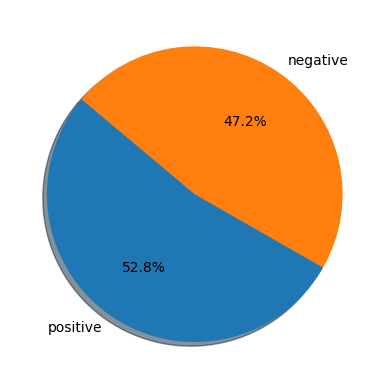

In [ ]:
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

* Print the count of positive and negative tweets

In [ ]:
print("Number of + tweets: {}".format(df[df["sentiment"]=="positive"].count()[0]))
print("Number of - tweets: {}".format(df[df["sentiment"]=="negative"].count()[0]))

Number of + tweets: 9897
Number of - tweets: 8830


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.3.2** Wordclouds

* The `Wordclouds` package is very useful to get a quick overview of most recurrent words in the text corpus

In [ ]:
from wordcloud import WordCloud

* What are the words most often present in positive tweets?

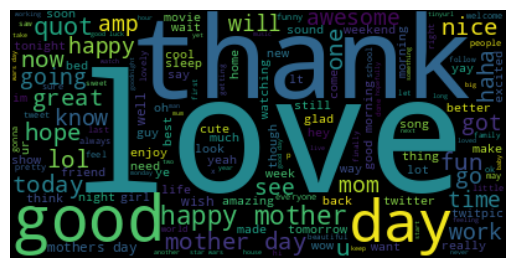

In [ ]:
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

* ... and in negative tweets?

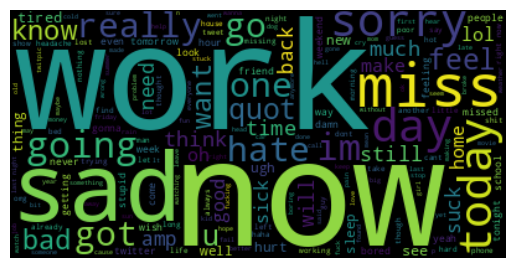

In [ ]:
neg_tweets = df[df["sentiment"]=="negative"]
txt = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 2` Text Normalisation

Text Normalisation is used to reduce randomness in a particulat text.

As this section relies quite a lot on `REGEX`, you might want to have a look at the following website: https://regexr.com/

In [ ]:
import re

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.1** Twitter features

* Example of a *random* tweet that can be found on Twitter

In [ ]:
tweet = "RT @NLPBootcamp I love this! 👍 https://NLPBootcamp.com #NLP #Fun"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.1** RT Tag

#### Need a hint?

* `R` : match "R" character
* `T` : match "T" character
* `\s` : match any whitespace character
* `+` : match one or more of the preceding tokens

#### Handle the RT Tag

* Replace occurences of `RT` with a default value

In [ ]:
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(replace_retweet(tweet)))

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.2** @User Tag

#### Need a hint?




* `\B` : match any position that is not a word boundary
* `@` : match "@" character
* `\w` : match any word character
* `+` : match one or more of the preceding tokens

#### Handle the User Tag

* Replace `@_Someone_` with a default user tag

In [ ]:
def replace_user(tweet, default_replace="twitteruser"):
  # Write your code here
  return tweet

In [ ]:
print("Processed tweet: {}".format(replace_user(tweet)))

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.3** Emojis

* Install the `emoji` package

In [ ]:
pip install emoji --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.9/457.9 kB 3.1 MB/s eta 0:00:00


* Import the installed package

In [ ]:
import emoji

* Replace emojis with a meaningful text using the `demojize()` function

In [ ]:
def demojize(tweet):
  # Write your code here
  return tweet

In [ ]:
print("Processed tweet: {}".format(demojize(tweet)))

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.4** URL

#### Need a hint?

* `(http|https)` : capturing group matching either http or https
* `:` : match the ":" character
* `\/` : match the "/" charachter
* `\S` : match any character that is not whitespace
* `+` : match one or more of the preceding tokens

#### Handle the URL

* Replace occurences of `http://` or `https://` with a default value

In [ ]:
def replace_url(tweet, default_replace=""):
  # Write your code here
  return tweet

In [ ]:
print("Processed tweet: {}".format(replace_url(tweet)))

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.5** Hashtags

* Replace occurences of `#_something_` with a default value

In [ ]:
def replace_hashtag(tweet, default_replace=""):
  # Write your code here
  return tweet

In [ ]:
print("Processed tweet: {}".format(replace_hashtag(tweet)))

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.2** Word Features

Let's now have a look at some other features that are not really Twitter-dependant

In [ ]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.1** Remove upper capitalization

* Lower case each letter in a specific tweet

In [ ]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [ ]:
print("Processed tweet: {}".format(to_lowercase(tweet)))

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.2** Word repetition

* Replace word repetition with a single occurence ("oooooo" becomes "oo")

In [ ]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(word_repetition(tweet)))

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.3** Punctuation repetition

* Replace punctuation repetition with a single occurence ("!!!!!" becomes "!")

In [ ]:
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

In [ ]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.4** Word contraction

In [ ]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.6 MB/s eta 0:00:00


In [ ]:
import contractions

* Use `contractions_dict` to list most common contractions

In [ ]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions dictionary
* ***Hint***: You can reference each item in the dictionary using `contractions.contractions_dict.items()`

In [ ]:
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet

In [ ]:
print("Processed tweet: {}".format(_fix_contractions(tweet)))

* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions package

In [ ]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.3** Tokenization

More information about NLTK? Head over to: https://www.nltk.org

* Install the `NLTK` package

In [ ]:
pip install nltk

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.1** Basic Tokenization

* Import `NLTK`
* Import the `word_tokenize` module from NLTK
* Download the `Punkt` tokenizer model from NLTK

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

* Simple tweet to be tokenized

In [ ]:
tweet = "These are 5 different words!"

* Create a `tokenize()` function that takes a tweet as input and returns a list of tokens

In [ ]:
# Write your code here

* Use the `tokenize()` function to print the tokenized version of a tweet

In [ ]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

That's it for the easy method! You will now see there is more you can do about it.

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.2** Custom Tokenization

In [ ]:
import string

* Retrieve English punctuation signs by using the `string` package

In [ ]:
print(string.punctuation)

- Import and download the `stopwords` module and NTLK

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

- Create a set of English stopwords

In [ ]:
stop_words = set(stopwords.words('english'))
print(stop_words)

- Remove some stopwords from the set

In [ ]:
stop_words.discard('not')
print(stop_words)

- Create a `custom_tokenize` function

In [ ]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):

  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

- Test the function with a tweet

In [ ]:
tweet = "these are 5 different words!"

print("Tweet tokens: {}".format(custom_tokenize(tweet,
                                                keep_punct=True,
                                                keep_alnum=True,
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.4** Stemming

More information about `NLTK.stem`? Head over to: https://www.nltk.org/api/nltk.stem.html

* Import different libraries and modules used for stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

* List of tokens to stem (remember that we stem tokens and not entire sentences)

In [ ]:
tokens = ["manager", "management", "managing"]

* Stemmers can be defined by directly using NLTK

In [ ]:
# Write your code here

* Create a `stem_tokens` function that takes the list of tokens as input and returns a list of stemmed tokens

In [ ]:
# Write your code here

* Print the different results and compare the stemmed tokens

In [ ]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

* Check over-stemming and under-stemming

In [ ]:
tokens = ["international", "companies", "had", "interns"]

In [ ]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.5** Lemmatization

More information about WordNet? Head over to https://wordnet.princeton.edu/

* Import different libraries and modules used for lemmatisation

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

* List of tokens to lemmatize (remember that we lemmatise tokens and not entire sentences)

In [ ]:
tokens = ["international", "companies", "had", "interns"]

* Part of Speech (POS) tagging

In [ ]:
word_type = {"international": wordnet.ADJ,
             "companies": wordnet.NOUN,
             "had": wordnet.VERB,
             "interns": wordnet.NOUN
             }

* Create the lemmatizer by using the `WordNet` module

In [ ]:
# Write your code here

* Create a `lemmatize_tokens` function that takes the list of tokens as input and returns a list of lemmatized tokens

In [ ]:
# Write your code here

In [ ]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.6** Putting it all together

* Long and complex tweet to be processed

In [ ]:
complex_tweet = r"""RT @NLPBootcamp : he looooook,
THis is a big and complex TWeet!!! 👍 ...
We'd be glad if you couldn't normalize it!
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"""

* Create a custom `process_tweet` function that can be used to process tweets end-to-end
* **Note**: this function will be used as a base for the following sections, so be careful!

In [ ]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
    # replace retweet
    # replace user tag
    # replace url
    # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
    # lower case
    # replace contractions
    # replace punctuation repetition
    # replace word repetition
    # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
    # tokenize
    # define stemmer
    # stem tokens

  return stem

* Test your `process_tweet` function!

In [ ]:
print(process_tweet(complex_tweet, verbose=False))

* Look at some more examples!
* **Note:** it's totally possible you encounter some strange tweet processing (happens if the original tweet is initially strangely written)

In [ ]:
import random

In [ ]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["tweet_text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 3` Text Representation </h2>

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.1** Processing Tweets

* Install the `Scikit-Learn` package which is very useful for a lot of different ML tasks.
* **Note:** make sure it is installed and up-to-date (once installed/updated, you might be asked to reload Colab).

In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 35.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


* Apply `process_tweet` function created in section 2 to the entire DataFrame
* Convert sentiment to 1 for "positive" and 0 for "negative" sentiment

In [ ]:
# Write your code here

* Convert DataFrame to two lists: one for the tweet tokens (X) and one for the tweet sentiment (y)







In [ ]:
# Write your code here

In [ ]:
print(X)
print(y)

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.2** Positive/Negative Frequency

* Corpus of tweet tokens used for the first method

In [ ]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

sentiment = [1, 0, 1, 1, 0, 0]


* Create a `build_freqs` function used to build a dictionnary with the word and sentiment as index and the count of occurence as value


<table style="width:100%">
  <tr>
    <th>Word</th>
    <th>Positive</th>
    <th>Negative</th>
  </tr>
  <tr>
    <td>love</td>
    <td>dict[(love, 1)]</td>
    <td>dict[(love, 0)]</td>
  </tr>
  <tr>
    <td>lost</td>
    <td>dict[(lost, 1)]</td>
    <td>dict[(lost, 0)]</td>
  </tr>
  <tr>
    <td>happy</td>
    <td>dict[(happy, 1)]</td>
    <td>dict[(happy, 0)]</td>
  </tr>
</table>


In [ ]:
# Write your code here

* Build the frequency dictionnary on the corpus by using the function

In [ ]:
# Write your code here

In [ ]:
print(freqs)

* Build the frequency dictionnary on the entire dataset by using the function

In [ ]:
# Write your code here

In [ ]:
print("Frequency of word 'love' in + tweets: {}".format(freqs_all[("love", 1)]))
print("Frequency of word 'love' in - tweets: {}".format(freqs_all[("love", 0)]))

* Create a `tweet_to_freqs` function used to convert tweets to a 2-d array by using the frequency dictionnary

In [ ]:
# Write your code here

* Print the 2-d vector by using the `tweet_to_freqs` function and the *corpus* dictionnary

In [ ]:
print(tweet_to_freq(["i", "love", "nlp"], freqs))

* Print the 2-d vector by using the `tweet_to_freqs` function and the *dataset* dictionnary

In [ ]:
print(tweet_to_freq(["i", "love", "nlp"], freqs_all))

* Plot word vectors in a chart and see where they locate

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))

word1 = "happi"
word2 = "sad"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

* Corpus of tweet tokens used for the second method

In [ ]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Import `CountVectorizer` from the Scikit-learn Library

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

* Create a `fit_cv` function used to build the Bag-of-Words vectorizer with the corpus

In [ ]:
# Write your code here

* Use the `fit_cv` function to fit the vectorizer on the corpus

In [ ]:
# Write your code here

* Get the vectorizer features (matrix columns)

In [ ]:
# Write your code here

In [ ]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

* Convert the corpus to a matrix by using the vectorize

In [ ]:
# Write your code here

* Print the matrix shape

In [ ]:
print("Matrix shape is: {}".format()

* Convert the matrix to an array

In [ ]:
# Write your code here

* Transform a new tweet by using the vectorizer

In [ ]:
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

In [ ]:
unknown_tweet = [["John", "drives", "cars"]]
cv_vect.transform(unknown_tweet).toarray()


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 4` Sentiment Model

## Helper function

This function will be used to plot the confusion matrix for the different models we will create

In [ ]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.1** Train/Test Split

* Check what X and y looks like

In [ ]:
print(X)
print(y)

* Import the `train_test_split` function from the Scikit-Learn package

In [ ]:
from sklearn.model_selection import train_test_split

* Use the `train_test_split` function to split arrays of X and y into training and testing variables

In [ ]:
# Write your code here

* Print the size of these news variables

In [ ]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

* Print random tweets, just to verify everything goes as expected

In [ ]:
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.2** Logistic Regression

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.1** Model

* Import the `LogisticRegression` model from Scikit-Learn

In [ ]:
from sklearn.linear_model import LogisticRegression

* Create a `fit_lr` function used to fit a Logistic Regression model on X and y *training* data

In [ ]:
# Write your code here


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px>  **4.2.2** Pos/Neg Frequency

* Use the `build_freqs` function on training data to create a frequency dictionnary
* Use the frequency dictionnary together with the `tweet_to_freq` function to convert X_train and X_test data to 2-d vectors

In [ ]:
# Write your code here

* Fit the Logistic Regression model on training data by using the `fit_lr` function
* Print the model coefficients (betas and intercept)

In [ ]:
# Write your code here

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.3** Count Vector

* Use the `fit_cv` function on training data to build the Bag-of-Words vectorizer
* Transform X_train and X_test data by using the vectorizer

In [ ]:
# Write your code here

* Fit the Logistic Regression model on training data by using the `fit_lr` function

In [ ]:
# Write your code here

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.3** Performance Metrics

* Import the `accuracy score` and `confusion matrix` from Scikit-Learn

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.1** Positive/Negative Frequencies

* Use the fitted `model_lr_pn` (positive/negative frequencies) to predict X_test
* Print the model accuracy by comparing predictions and real sentiments



In [ ]:
# Write your code here

In [ ]:
print("LR Model Accuracy: {:.2%}".format())

* Plot the confusion matrix by using the `plot_confusion` helper function

In [ ]:
# Write your code here

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.2** Count Vector

* Use the fitted `model_lr_cv` (Bag-of-words) to predict X_test
* Print the model accuracy by comparing predictions and real sentiments



In [ ]:
# Write your code here

In [ ]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

* Plot the confusion matrix by using the `plot_confusion` helper function

In [ ]:
# Write your code here

*Lab has been adapted from AIOutsider.*